# <center>CS-485 Data Science and Applications</center>
## <center>Assignment 1</center>
### <center>Alexandros Angelakis csdp1363, angelakis@csd.uoc.gr</center>

The objective in this excersize is analyze a dataset by performing PCA and linear regression.

Complete the relevant code after the corresponding cells.

Then upload the notebook to elearn.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Load the california housing dataset

In [126]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
print(df.columns)
data = df.to_numpy()
df.head()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Visualize the data e.g. *correlation matrices*, *scatterplots*, something else

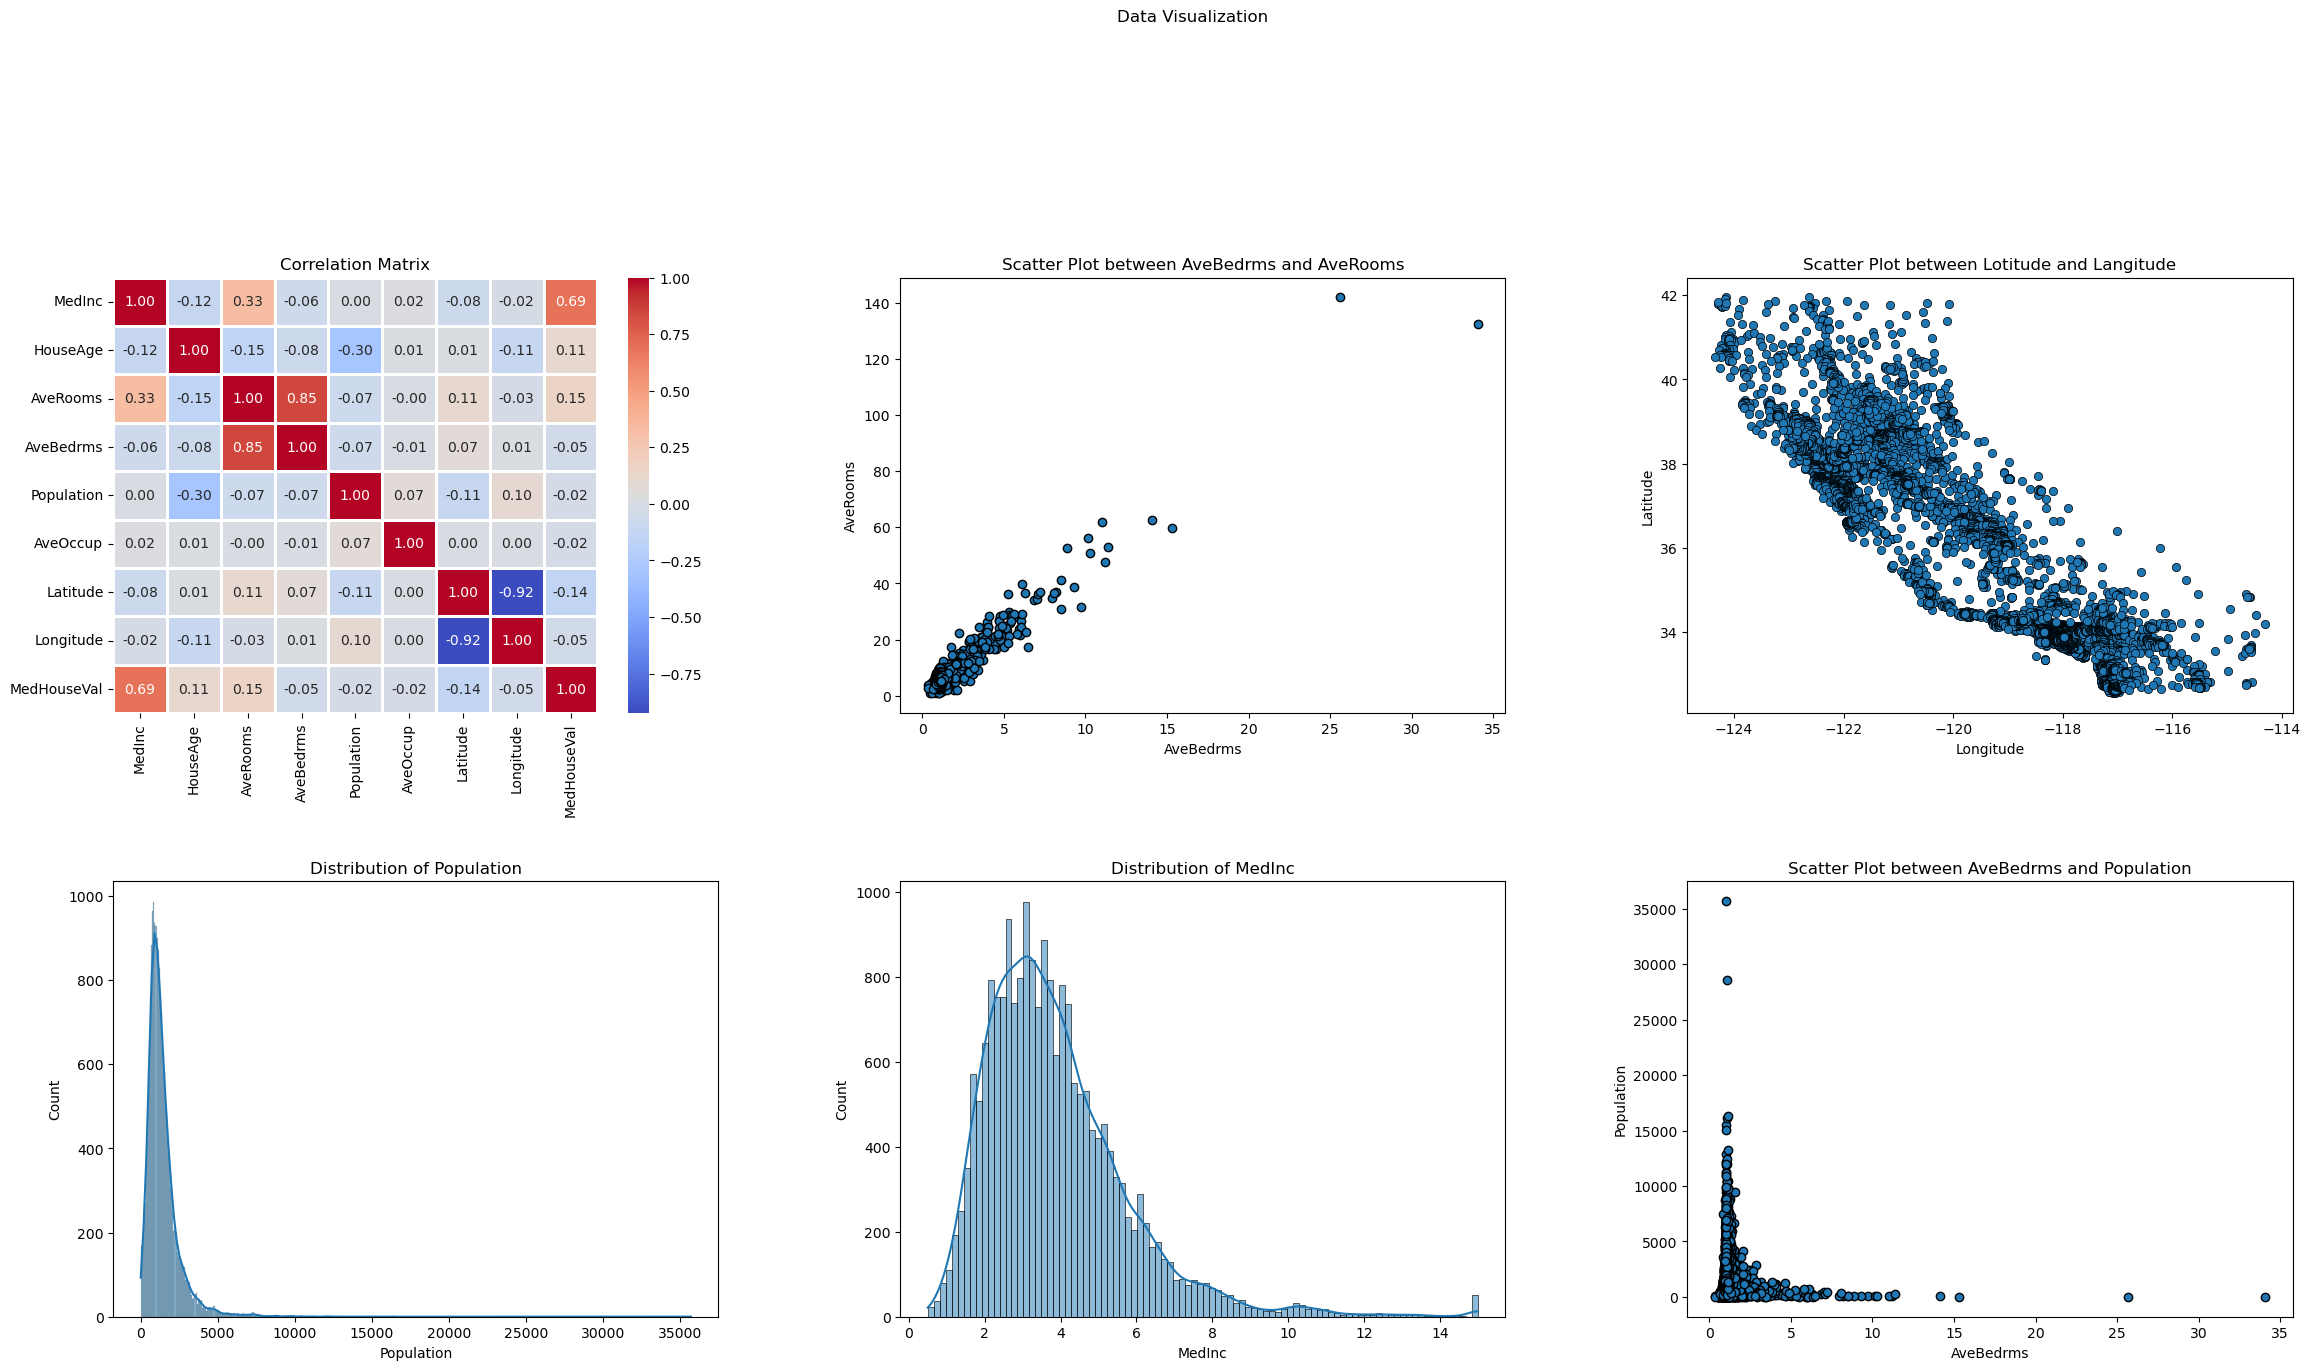

In [127]:
# In order to visualize the correlation matrix of our data, we first need to caclulate
# the correlation between them.
corr = df.corr()

fig, axes = plt.subplots(2, 3, figsize=(25,15))
fig.suptitle('Data Visualization')
fig.tight_layout(pad=10.0)

# Correlation Matrix
corr_mat = sns.heatmap(corr, annot=True, fmt='.2f', linewidth=2, ax=axes[0][0], cmap='coolwarm')
axes[0][0].set_title('Correlation Matrix')

# We can see from the correlation matrix that the AveRooms and the AveBedrms are
# the most related from all the columns, since their correlation is very high.
# It'll be fun to see their scatter plot and see how correlation affects the
# output. We can also test that with the lowest correlation, for example with
# the correlation between Longitude and Latitude.

# ScatterPlot
sns.scatterplot(data=df, x='AveBedrms', y='AveRooms', ax=axes[0][1], edgecolor="black", linewidth=1)
axes[0][1].set_title('Scatter Plot between AveBedrms and AveRooms')

sns.scatterplot(data=df, x='Longitude', y='Latitude', ax=axes[0][2], edgecolor="black", linewidth=0.5)
axes[0][2].set_title('Scatter Plot between Lotitude and Langitude')

# We can see from the scatter plot of AveBedrms and AveRooms that the "dots" are
# close to each other and it is easy to draw a line between the values.
# Unlike the scatter plot of Lotitude and Langitude, since they are not related,
# the "dots" are all over the place and it's not easy to fit and find a line
# between them.

# We can see from the distribution plot that the population is distributted by a Normal PDF
sns.histplot(df['Population'], ax=axes[1][0], kde=True)
axes[1][0].set_title('Distribution of Population')

# The same goes with the MedInc
sns.histplot(df['MedInc'], ax=axes[1][1], kde=True)
axes[1][1].set_title('Distribution of MedInc')

sns.scatterplot(data=df, x='AveBedrms', y='Population', ax=axes[1][2], edgecolor="black", linewidth=1)
axes[1][2].set_title('Scatter Plot between AveBedrms and Population')

plt.show()
plt.close()

split the data to training (80%) and test (20%) sets and standarize the features if necessary (NOT NEEDED EVENTUALLY FOR THIS ASSIGNMENT!)

In [128]:
# Standarization of each feature
normal_stand = StandardScaler()
data_stand = normal_stand.fit_transform(data)

perform PCA to reduce the number of features

In [129]:
pca2 = PCA(n_components=2)
pc2 = pca2.fit_transform(data_stand)

pca3 = PCA(n_components=3)
pc3 = pca3.fit_transform(data_stand)

print(pc2.shape, pc3.shape)

(20640, 2) (20640, 3)


#### I also computed the PCAs by hand, but <b>dont run</b> this block of code. I give it to you to prove you that I didn't just use Chat-GPT to solve the assignment :D. I just followed the steps from the slides.

In [130]:
# Step 1: Standarization of each feature
data_stand_opt = np.zeros((data_stand.shape))
for i in range(len(df.columns)):
    data_stand_opt[:,i] = (data[:,i] - np.mean(data[:,i], axis=0)) / np.std(data[:,i], axis=0)

# Step 2: Covariance Matrix Computation
cov_matrix = np.cov(data_stand_opt.T, bias=0)
print(f'Shape of the covariance matrix of the training data: {cov_matrix.shape}')

# Step 3: Compute the Eigenvectors and Eigenvalues of the Covariance Matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f'Shape of the eigenvalues: {eigenvalues.shape}, shape of eigenvectors: {eigenvectors.shape}')

# Step 4: Choose Principal Components
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
top2_eigen_vectors = eigenvectors[:, :2]
top3_eigen_vectors = eigenvectors[:, :3]

# Step 5: Projection onto the nea feature space
transformed_data_top2 = data_stand_opt @ top2_eigen_vectors
transformed_data_top3 = data_stand_opt @ top3_eigen_vectors
print(f'Shape of transformed_data_top2: {transformed_data_top2.shape}, shape of transformed_data_top3: {transformed_data_top3.shape}')

Shape of the covariance matrix of the training data: (9, 9)
Shape of the eigenvalues: (9,), shape of eigenvectors: (9, 9)
Shape of transformed_data_top2: (20640, 2), shape of transformed_data_top3: (20640, 3)


provide scatterplots for the case of projections in 2 and 3 dimensions

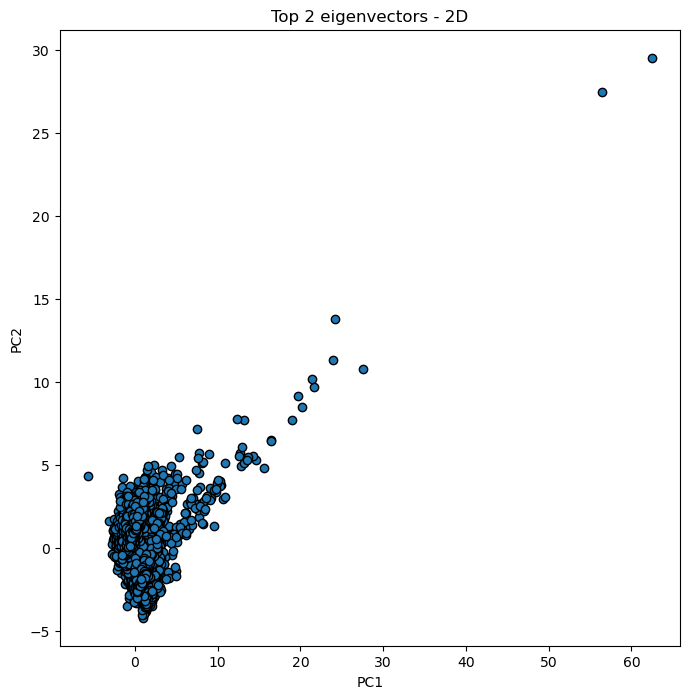

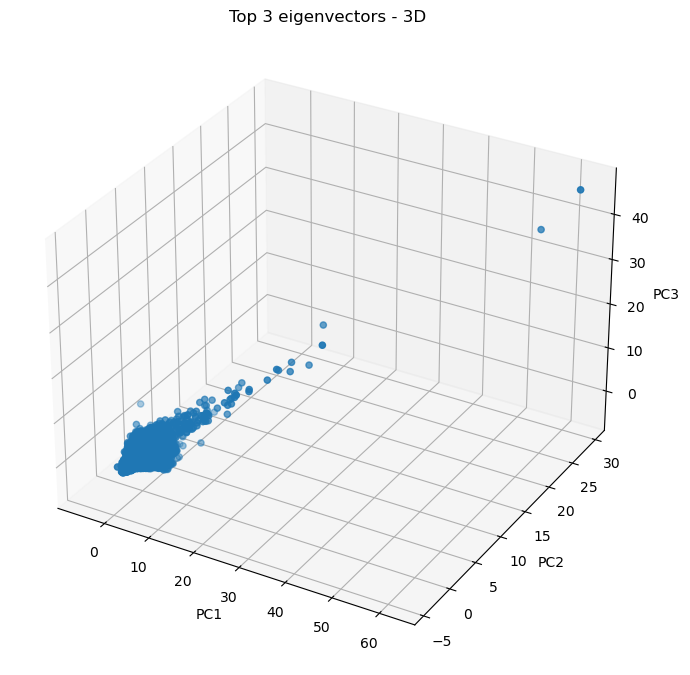

In [131]:
# Scatter Plot of projections in 2 dimensions
pc2_df = pd.DataFrame(pc2, columns=['PC1', 'PC2'])
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=pc2_df, x='PC1', y='PC2', edgecolor="black", linewidth=1)
plt.title("Top 2 eigenvectors - 2D")
plt.show()

# Scatter Plot of projections in 3 dimensions
fig = plt.figure(figsize=(8.25,8.25))
ax = plt.axes(projection='3d')
x = pc3[:,0]
y = pc3[:,1]
z = pc3[:,2]
ax.scatter(x, y, z)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Top 3 eigenvectors - 3D")
plt.show()


perform linear regression using the original features

In [132]:
model_original = LinearRegression()
model_original.fit(data_stand[:, :-1], data_stand[:, -1])

LinearRegression()

perform linear regression using PCA-reduced features

In [133]:
model_pca2 = LinearRegression()
model_pca2.fit(pc2, data_stand[:, -1])

model_pca3 = LinearRegression()
model_pca3.fit(pc3, data_stand[:, -1])

LinearRegression()

Compare the perfornance of linear regression on the original vs the PCA features

In [134]:
# We'll need some sort of comparison in order to check which linear regression is better.
# There are many kinds of comparison metrics like MSE, RMSE, MAE etc.
# For our example, I will use the MSE (Mean Squared Error).

# First of all, we need to predict an output from our original model, so we can then calculate the MSE
y_hat_test_original = model_original.predict(data_stand[:, :-1])
mse_test_original = mean_squared_error(data_stand[:, -1], y_hat_test_original)

# Then, we calculate the MSE of the pca2 model
y_hat_test_pca2 = model_pca2.predict(pc2)
mse_test_pca2 = mean_squared_error(data_stand[:, -1], y_hat_test_pca2)

# Then, we calculate the MSE of the pca3 model
y_hat_test_pca3 = model_pca3.predict(pc3)
mse_test_pca3 = mean_squared_error(data_stand[:, -1], y_hat_test_pca3)

print(f'MSE of original features: {mse_test_original}')
print(f'MSE of PCA features with 2 principal components: {mse_test_pca2}')
print(f'MSE of PCA features with 3 principal components: {mse_test_pca3}')

MSE of original features: 0.3937673148001949
MSE of PCA features with 2 principal components: 0.684591978084865
MSE of PCA features with 3 principal components: 0.15641979411272147


#### As we can see, the difference between the MSEs computed with 2 PCs and 3 PCs is really high. Also, the linear regression on the original features performs better than the linear regression on 2 PCA features, but worse than the linear regression on 3 PCA features.

Quantify the impact of the number of principal components on the regression?

The Mean Squared Error (MSE) between 1 princinal component features and the y_test is: 0.9307150474100359
The Mean Squared Error (MSE) between 2 princinal component features and the y_test is: 0.6845919780848662
The Mean Squared Error (MSE) between 3 princinal component features and the y_test is: 0.15641979411272147
The Mean Squared Error (MSE) between 4 princinal component features and the y_test is: 0.1554032022369077
The Mean Squared Error (MSE) between 5 princinal component features and the y_test is: 0.1554031558314106
The Mean Squared Error (MSE) between 6 princinal component features and the y_test is: 0.1361869983802542
The Mean Squared Error (MSE) between 7 princinal component features and the y_test is: 0.002751589306862306
The Mean Squared Error (MSE) between 8 princinal component features and the y_test is: 0.0003242099689871123
The Mean Squared Error (MSE) between 9 princinal component features and the y_test is: 2.1246060290344855e-30


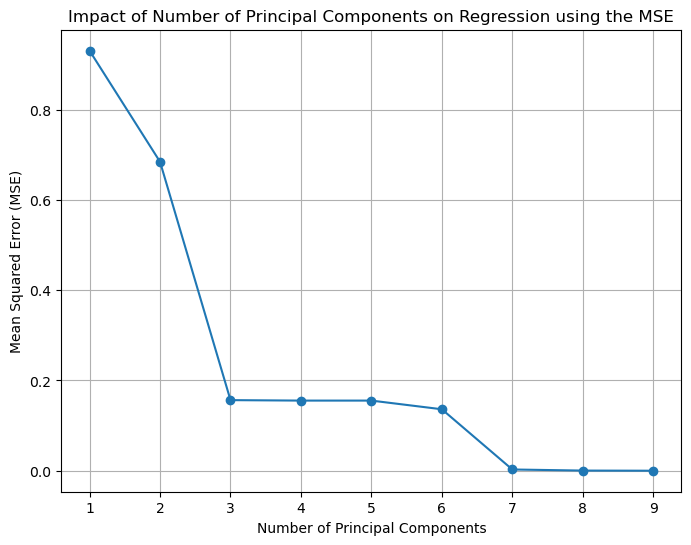

In [135]:
mses = np.zeros(len(df.columns))
exp_var_pca = np.zeros(len(df.columns))
cum_sum_eigenvalues = np.zeros(len(df.columns))

for i in range(1, len(df.columns) + 1):
    pca = PCA(n_components=i)
    pc = pca.fit_transform(data_stand)

    model = LinearRegression()
    model.fit(pc, data_stand[:, -1])

    y_pred = model.predict(pc)
    mses[i-1] = mean_squared_error(data_stand[:, -1], y_pred)

    if i == len(df.columns):
        exp_var_pca = pca.explained_variance_ratio_
        cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    

for i, mse in enumerate(mses):
    print(f'The Mean Squared Error (MSE) between {i+1} princinal component features and the y_test is: {mse}')

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df.columns)+1), mses, marker='o')
plt.title('Impact of Number of Principal Components on Regression using the MSE')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

#### We can see that when the number of PCs is greater than 6, the MSE is almost the same as the PCs are increasing. That means, when we reduce the features of our dataset to 3, the amount of information we are losing is not that critical. Hence, we can almost express the whole dataset with just 6 features.

#### We can confirm what we said earlier from the plot below, we get 90% of the information with 6 features. Maybe the optimal is to find only 5 components to reduce the amount of time needed to calculate the principal components, but since our dataset has only 9 features, it's irrelevant.

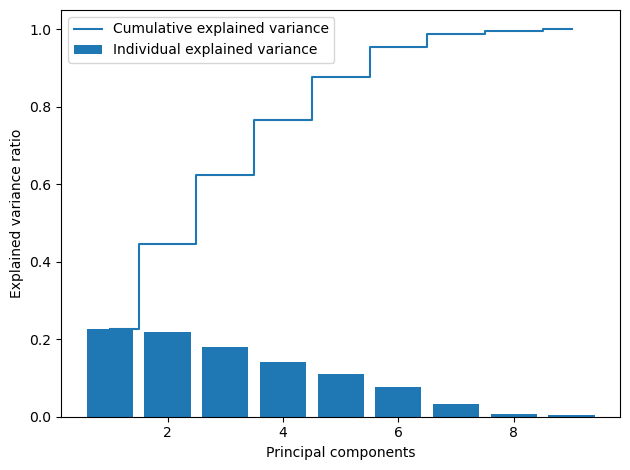

In [139]:
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()